# Module 1 Example

The dataset is known to contain information about the total nitrogen content, in mg N per $m^3$, in the effluent stream of a wastewater treatment plant. The required limit value is 18 mg N per $m^3$. The dataset contains daily samples for approximately a three week period.

We are interested in seeing if the effluent complies with regulations, and if there may be problems complying with regulations in future.

We will begin by importing the relevant libraries and modules for our problem. We could also import these as we discover our need for them, but if we know what we're going to be doing we can go ahead and import the ones we know we will need.

In [1]:
import pandas
import numpy
from scipy import stats
from matplotlib import pyplot

We load in our data, as in the tutorial:

In [2]:
N_data = pandas.read_csv(
        r'https://raw.githubusercontent.com/imheidimarais/Engineering-Statistics/master/data/Ntot_Data.csv'
    )

And we can begin by making sure that our data imported properly and try understand what we're working with. We will do this by looking at the size of the dataframe, and the column names. These we can compare to our raw data file and make sure that the import went smoothly.

In [3]:
print(f"Size of data: {N_data.shape[0]} rows, {N_data.shape[1]} column(s).")
print("The column title(s) in the dataset are:")
for c in N_data.columns:
    print(c) 

Size of data: 21 rows, 1 column(s).
The column title(s) in the dataset are:
Ntot


Having confirmed that the data imported as expected, perhaps a good place to start is with visualising our data. 
We are interested in: 
+ the spread of data
+ the statistics (mean, variance, etc.)
+ if there are any outliers/noise/missing data.

We will use an index plot and a boxplot to accomplish this, the code is the same as in the tutorial, but here we specify the column name instead of keeping it completely general.

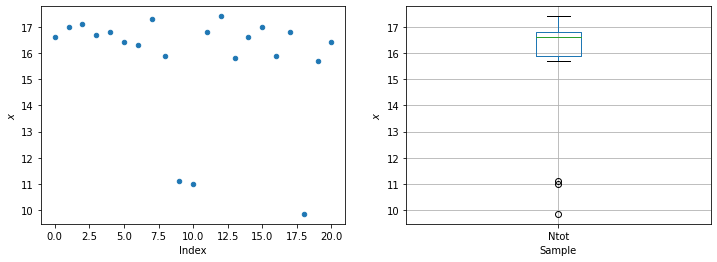

In [4]:
fig = pyplot.Figure(figsize=(12, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

N_data.reset_index().plot(x='index', y='Ntot', kind='scatter', ax=ax1)
N_data.boxplot(column='Ntot', ax=ax2)

ax1.set(
        xlabel='Index',
        ylabel='$x$'
    )
ax2.set(
        xlabel='Sample',
        ylabel='$x$'        
    )
fig

We see that there are three suspected outliers, all below our regulation limit. And we can see the median is around 16.6. The data appears well behaved aside from the outliers. 

We can calculate the sample statistics:

In [5]:
descriptive_statistics = N_data.describe()
print(descriptive_statistics)

            Ntot
count  21.000000
mean   15.736190
std     2.188585
min     9.860000
25%    15.900000
50%    16.600000
75%    16.800000
max    17.400000


And we can immediately see the calculated mean is much lower than the median, and does not appear to represent the majority of the data. The outliers are dragging it down significantly.

However, for the sake of completeness we will look at the distribution of the data before we remove any outliers. We will do this with a histogram, and an empirical cumulative distribution function. We will overlay the pdf and cdf of a true normal distribution with the same mean and variance as our data.

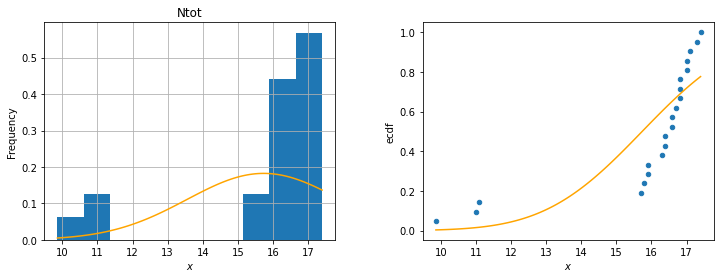

In [6]:
number_bins = 10
fig = pyplot.Figure(figsize=(12, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

N_data.hist(column='Ntot', bins=number_bins, density=True, ax=ax1)

xrange1 = (N_data['Ntot'].min(), N_data['Ntot'].max())
normal_pdf_xs = numpy.linspace(xrange1[0], xrange1[1], 100)
normal_pdf_ys = stats.norm.pdf(
        normal_pdf_xs, loc=descriptive_statistics['Ntot']['mean'], scale=descriptive_statistics['Ntot']['std']
    )
ax1.plot(normal_pdf_xs, normal_pdf_ys, c="orange")


N_data_sorted = N_data.sort_values(by='Ntot', ascending=True)
ecdf = [n/N_data_sorted.shape[0] for n in range(1, N_data_sorted.shape[0]+1)]
N_data_sorted['ecdf'] = numpy.array(ecdf)

normal_cdf_ys = stats.norm.cdf(
        normal_pdf_xs, loc=descriptive_statistics['Ntot']['mean'], scale=descriptive_statistics['Ntot']['std']
    )

N_data_sorted.plot(x='Ntot', y='ecdf', kind='scatter', ax=ax2)
ax2.plot(normal_pdf_xs, normal_cdf_ys, c="orange")

ax1.set(
        xlabel='$x$',
        ylabel='Frequency'
    )

ax2.set(
        xlabel='$x$',
        ylabel='ecdf'
    )
fig

The outliers make it impossible to compare our data to the theoretical normal distribution, and they severely skew the histogram and ecdf plots.

For now, we can temporarily remove the outliers. Exercise caution when removing outliers in general as they may contain important information. In this case they were below the regulation limit (not concerning) and an analysis of additional data showed that they came from days with extremely high rainfall. So, for our purposes we can consider it safe to remove the outliers.

In [7]:
N_data_no_outliers = N_data[N_data['Ntot']>12]

We will now look again at the descriptive statistics, and then at the distributions.

            Ntot
count  18.000000
mean   16.583333
std     0.510190
min    15.700000
25%    16.325000
50%    16.650000
75%    16.950000
max    17.400000


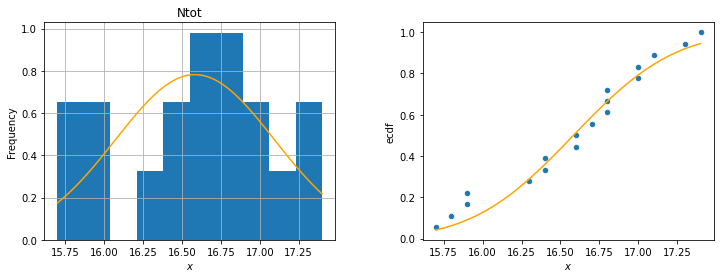

In [8]:
descriptive_statistics_new = N_data_no_outliers.describe()
print(descriptive_statistics_new)
number_bins = 10
fig = pyplot.Figure(figsize=(12, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

N_data_no_outliers.hist(column='Ntot', bins=number_bins, density=True, ax=ax1)

xrange1 = (N_data_no_outliers['Ntot'].min(), N_data_no_outliers['Ntot'].max())
normal_pdf_xs = numpy.linspace(xrange1[0], xrange1[1], 100)
normal_pdf_ys = stats.norm.pdf(
        normal_pdf_xs, loc=descriptive_statistics_new['Ntot']['mean'], scale=descriptive_statistics_new['Ntot']['std']
    )
ax1.plot(normal_pdf_xs, normal_pdf_ys, c="orange")


N_data_sorted = N_data_no_outliers.sort_values(by='Ntot', ascending=True)
ecdf = [n/N_data_sorted.shape[0] for n in range(1, N_data_sorted.shape[0]+1)]
N_data_sorted['ecdf'] = numpy.array(ecdf)

normal_cdf_ys = stats.norm.cdf(
        normal_pdf_xs, loc=descriptive_statistics_new['Ntot']['mean'], scale=descriptive_statistics_new['Ntot']['std']
    )

N_data_sorted.plot(x='Ntot', y='ecdf', kind='scatter', ax=ax2)
ax2.plot(normal_pdf_xs, normal_cdf_ys, c="orange")

ax1.set(
        xlabel='$x$',
        ylabel='Frequency'
    )

ax2.set(
        xlabel='$x$',
        ylabel='ecdf'
    )
fig

We can see that the mean is much closer to the median value we observed in the boxplot, which is a good sign!

We also see that, especially the ecdf, appears fairly normal. While this does not pass as any true test of normallity, it is still a useful thing to do to get an idea of the distribution of your data so that you can better interpret the results of statistical tests that you may carry out.